Examples of hypothesis testing, feature engineering, feature selection, model tuning, data visualisation and interpretation

In [40]:
import sys
sys.path += ['C:\\Program Files\\Python37\\lib\\site-packages']
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [41]:
data = pd.read_csv("radon.csv")
data.columns = [col.replace(' ', '') for col in data.columns]
with pd.option_context('display.max_columns', None):
    display(data)

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,windoor,rep,stratum,wave,starttm,stoptm,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county
0,1,AZ,AZ,4,85920,1,1,1,2,N,,2,1,30,1100,1100,112987,120287,0.3,0.0,136.060971,0,0,1,APACHE
1,2,AZ,AZ,4,85920,1,0,9,0,,,1,1,117,600,700,70788,71188,0.6,33.3,128.784975,0,0,1,APACHE
2,3,AZ,AZ,4,85924,1,1,1,3,N,,4,1,122,1145,1145,70788,70788,0.5,0.0,150.245112,0,0,1,APACHE
3,4,AZ,AZ,4,85925,1,1,1,3,N,,2,1,3,1900,1900,52088,52288,0.6,97.2,136.060971,0,0,1,APACHE
4,5,AZ,AZ,4,85932,1,1,1,1,N,,2,1,118,800,900,70788,70788,0.3,0.0,136.060971,0,0,1,APACHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,12773,R5,WI,55,54660,4,1,0,4,Y,,.,27,.,900,900,30388,30388,0.6,28.0,4.761628,0,0,81,WISCONSIN WINNEBAGO
12773,12774,R5,WI,55,54660,4,1,1,3,N,,.,27,.,1530,1615,30388,30388,2.2,14.5,4.761628,0,0,81,WISCONSIN WINNEBAGO
12774,12775,R5,WI,55,54660,4,1,1,3,Y,,.,27,.,845,830,31588,31788,0.4,0.0,4.761628,0,0,81,WISCONSIN WINNEBAGO
12775,12776,R5,WI,55,54660,4,1,1,3,N,,.,27,.,815,730,31588,31788,0.3,0.0,4.761628,0,0,81,WISCONSIN WINNEBAGO


Data cleaning

In [42]:
# remove meaningless columns
data.drop(axis=1, labels=['idnum', 'dupflag', 'pcterr'], inplace=True)

# data cleaning: remove duplicates and NaN rows
data.drop_duplicates(inplace=True)
data.dropna(axis=1, inplace=True, how='all')

In [43]:
for col in data.columns:
    print(data[col].value_counts())

PA    2389
IN    1914
MO    1859
MA    1659
ND    1596
AZ    1507
R5     934
MN     919
Name: state, dtype: int64
PA    2389
IN    1914
MO    1859
MA    1659
ND    1596
AZ    1507
MN    1188
WI     461
MI     204
Name: state2, dtype: int64
42    2389
18    1914
29    1859
25    1659
38    1596
4     1507
27    1188
55     461
26     204
Name: stfips, dtype: int64
58201    139
54135    129
58601    101
58554     71
58103     68
        ... 
47612      1
85305      1
16156      1
46748      1
15486      1
Name: zip, Length: 3195, dtype: int64
3     2741
1     2399
4     2040
2     1635
5     1369
6     1108
7      408
9      375
8      361
10     266
11      75
Name: region, dtype: int64
1    11510
0      624
2      483
5      151
3        9
Name: typebldg, dtype: int64
0    8465
1    3983
9     287
2      23
3      19
Name: floor, dtype: int64
4    5068
2    2095
3    1717
1    1578
0    1219
7     982
5     115
6       3
Name: room, dtype: int64
Y    8640
N    3384
      679
0      74


In [44]:
data[data['state'] != data['state2']].shape

(934, 22)

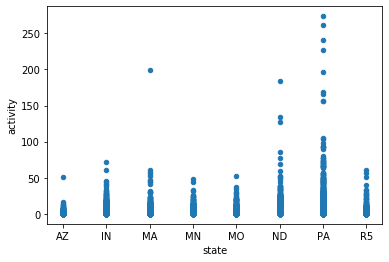

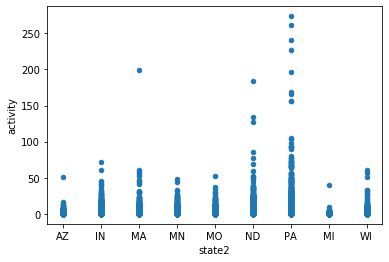

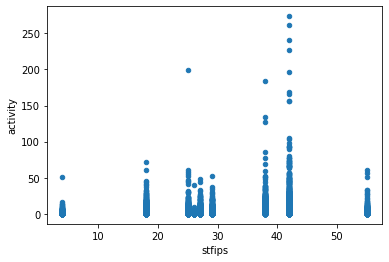

KeyboardInterrupt: 

In [6]:
# scatter plot all features & calculate correlation with label
labelcol = 'activity'
labels = data[labelcol].values

for col in data.columns:
    if col != labelcol: 
        data[[col, labelcol]].plot.scatter(x=col, y=labelcol)
        plt.show()

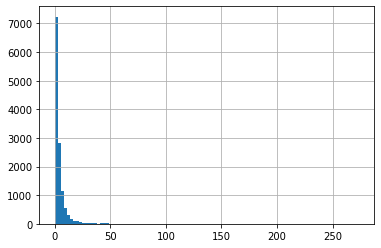

In [7]:
data[labelcol].hist(bins=100)

Feature encoding

In [48]:
# choose these features to encode
features_onehot = ['state', 'region', 'typebldg', 'basement']
features_numerical = ['floor', 'stoptm', 'stfips', 'stratum', 'room']
features_ordinal = ['county']

# feature encoding
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

numerical_encoder = StandardScaler() # scale numerical columns
data_enc = pd.DataFrame(numerical_encoder.fit_transform(data[features_numerical]), columns=features_numerical)

onehot_encoded = pd.get_dummies(data[features_onehot])
data_enc = pd.concat((data_enc, onehot_encoded), axis=1) # one-hot encoding

ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(data[features_ordinal])
data_enc = pd.concat((data_enc, pd.DataFrame(ordinal_encoded, columns=features_ordinal)), axis=1) # one-hot encoding

data_enc

,floor,stoptm,stfips,stratum,room,region,typebldg,state_AZ,state_IN,state_MA,state_MN,state_MO,state_ND,state_PA,state_R5,basement_,basement_0,basement_N,basement_Y,county
0,0.348714,-0.620104,-1.909837,-0.589181,-0.575083,1,1,1,0,0,0,0,0,0,0,0,0,1,0,8.0
1,6.184367,-1.433604,-1.909837,-0.589181,-1.696548,1,0,1,0,0,0,0,0,0,0,1,0,0,0,8.0
2,0.348714,-0.528586,-1.909837,-0.589181,-0.014351,1,1,1,0,0,0,0,0,0,0,0,0,1,0,8.0
3,0.348714,1.006895,-1.909837,-0.589181,-0.014351,1,1,1,0,0,0,0,0,0,0,0,0,1,0,8.0
4,0.348714,-1.026854,-1.909837,-0.589181,-1.135815,1,1,1,0,0,0,0,0,0,0,0,0,1,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12772,-0.380742,-1.026854,2.124478,5.753240,0.546382,4,1,0,0,0,0,0,0,0,1,0,0,0,1,377.0
12773,0.348714,0.427277,2.124478,5.753240,-0.014351,4,1,0,0,0,0,0,0,0,1,0,0,1,0,377.0
12774,0.348714,-1.169217,2.124478,5.753240,-0.014351,4,1,0,0,0,0,0,0,0,1,0,0,0,1,377.0
12775,0.348714,-1.372591,2.124478,5.753240,-0.014351,4,1,0,0,0,0,0,0,0,1,0,0,1,0,377.0


Model training: classifier with equal balance of classes

In [ ]:
labels_binary = [1 if l>10 else 0 for l in labels] # make binary class labels

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 10221 samples, validate on 2556 samples
Epoch 1/40
10221/10221 [==============================] - 1s 60us/sample - loss: 4.3407 - val_loss: 0.0946
Epoch 2/40
10221/10221 [==============================] - 0s 17us/sample - loss: 0.7020 - val_loss: 0.1001
Epoch 3/40
10221/10221 [==============================] - 0s 21us/sample - loss: 0.3229 - val_loss: 0.0394
Epoch 4/40
10221/10221 [==============================] - 0s 18us/sample - loss: 0.1604 - val_loss: 0.0557
Epoch 5/40
10221/10221 [==============================] - 0s 18us/sample - loss: 0.1383 - val_loss: 0.0856
Epoch 6/40
10221/10221 [==============================] - 0s 18us/sample - loss: 0.0896 - val_loss: 0.0367
Epoch 7/40
10221/10221 [==============================] - 0s 18us/sample - loss: 0.0628 - val_loss: 0.0378
Epoch 8/40
10221/10221 [==============================] - 0s 18us/sample - loss: 0.0579 - val_loss: 0.0501
Epoch 9/40
10221/10221 [=====================

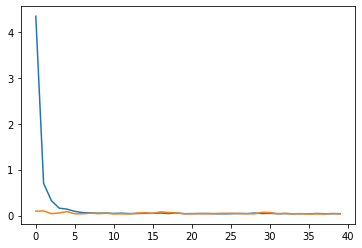

0.7404891695451928


In [53]:
# FC NN
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(),
              loss=tf.keras.losses.MeanSquaredError(),
              )

weights = {1:1-sum(labels_binary)/len(labels_binary), 0: sum(labels_binary)/len(labels_binary)}

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_enc.to_numpy(), np.array(labels_binary), test_size=0.2)

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                    epochs=40, class_weight=weights, batch_size=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, model.predict(X_test)))

(10221, 20) (2556, 20)
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 10221 samples, validate on 2556 samples
Epoch 1/40
10221/10221 [==============================] - 1s 107us/sample - loss: 0.0720 - val_loss: 0.0360
Epoch 2/40
10221/10221 [==============================] - 1s 60us/sample - loss: 0.0372 - val_loss: 0.0331
Epoch 3/40
10221/10221 [==============================] - 1s 64us/sample - loss: 0.0350 - val_loss: 0.0345
Epoch 4/40
10221/10221 [==============================] - 1s 54us/sample - loss: 0.0353 - val_loss: 0.0348
Epoch 5/40
10221/10221 [==============================] - 1s 65us/sample - loss: 0.0343 - val_loss: 0.0334
Epoch 6/40
10221/10221 [==============================] - 1s 55us/sample - loss: 0.0339 - val_loss: 0.0328
Epoch 7/40
10221/10221 [==============================] - 1s 55us/sample - loss: 0.0338 - val_loss: 0.0334
Epoch 8/40
10221/10221 [==============================] - 1s 54us/sample - loss: 0.0334 - val_loss: 0.0324
Epoch 9/40
10221/1022

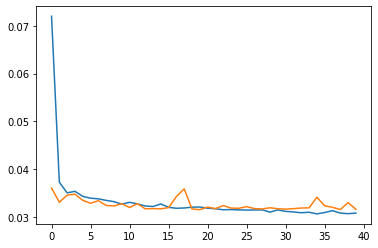

0.7674929967485241


In [128]:
# CNN
model = tf.keras.Sequential([
    layers.Reshape((20,1), input_shape=(20,)),
    layers.Conv1D(64, 5, activation='relu'),
    layers.Dropout(0.1),
    layers.Conv1D(32, 5, activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(),
              loss=tf.keras.losses.MeanSquaredError(),
              )

weights = {1:1-sum(labels_binary)/len(labels_binary), 0: sum(labels_binary)/len(labels_binary)}

from sklearn.model_selection import train_test_split
X = data_enc.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, np.array(labels_binary), test_size=0.2)
print(X_train.shape, X_test.shape)

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                    epochs=40, class_weight=weights, batch_size=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, model.predict(X_test)))

In [156]:
# explain using SHAP
import shap

inds = np.random.choice(X_train.shape[0], 10, replace=False)
explainer = shap.DeepExplainer(model, X_train[inds, :])
shap_values = explainer.shap_values(X_test)

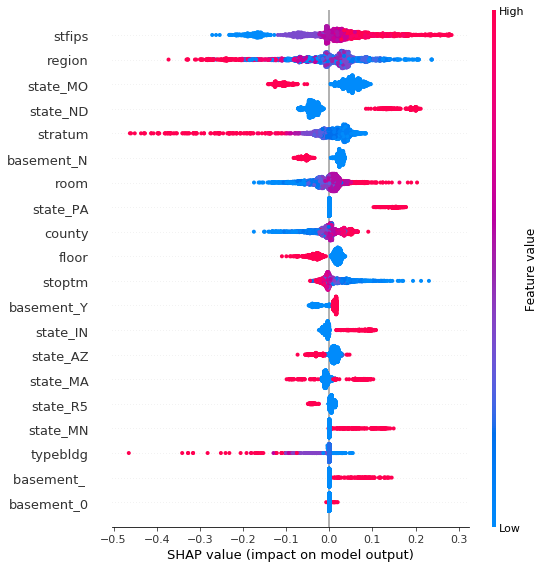

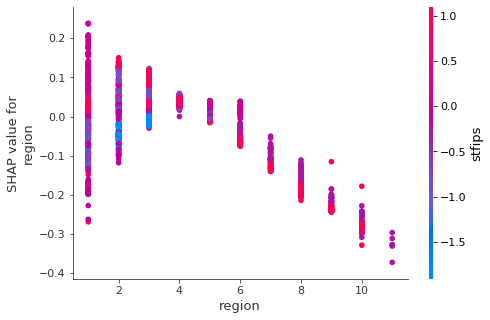

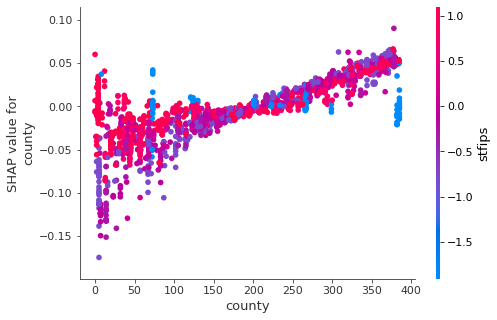

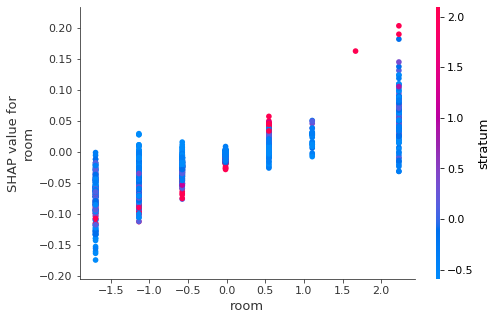

In [154]:
shap.summary_plot(shap_values[0], X_test, feature_names=data_enc.columns, plot_type="dot", max_display=50)
shap.dependence_plot('region', shap_values[0], X_test, dot_size=32, feature_names=data_enc.columns)
shap.dependence_plot('county', shap_values[0], X_test, dot_size=32, feature_names=data_enc.columns)
shap.dependence_plot('room', shap_values[0], X_test, dot_size=32, feature_names=data_enc.columns)
shap.force_plot(explainer.expected_value.numpy(), shap_values[0][0], X_test[0], feature_names=data_enc.columns)

In [ ]:
# for ordinal features, invert transformation and plot (global) SHAP values

# for one-hot encoded features, collect all matching columns and plot (global) SHAP values

In [ ]:
#num_elements_pos = sum(labels_binary)
#num_elements_neg = len(labels_binary)-num_elements_pos
#num_elements_neg_train = int(num_elements_neg*(1-split))
#num_elements_pos_train = int(num_elements_pos*(1-split))

#dataset = tf.data.Dataset.from_tensor_slices((data_enc.values, labels_binary))

#negative_ds = (dataset.filter(lambda features, label: label == 0).repeat())
#positive_ds = (dataset.filter(lambda features, label: label == 1).repeat())

#dataset_train = tf.data.experimental.sample_from_datasets(
#    [negative_ds.take(num_elements_neg_train), positive_ds.take(num_elements_pos_train)], 
#    weights=[0.5, 0.5]
#)

#dataset_test = tf.data.experimental.sample_from_datasets(
#    [negative_ds.skip(num_elements_neg_train), positive_ds.skip(num_elements_pos_train)], 
#    weights=[0.9, 0.1]
#)

#history = model.fit(dataset_train, validation_data=dataset_test,
#epochs=30, steps_per_epoch=1000, validation_steps=200)

Train regressor (transform label using nonlinear transformation, e.g. log)